# House Pricing Kaggle Challenge

The packages used in this file are outdated. This was my first Kaggle challenge years ago. My coding and problem solving skills are more improved now than years ago. I just want to share one of the first projects I worked on.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
from scipy import stats
from sklearn.impute import SimpleImputer
from scipy.special import boxcox1p
from scipy.stats import norm
from sklearn.impute import SimpleImputer
%matplotlib inline

In [2]:
train_data = pd.read_csv("train.csv",index_col=0)
print(train_data)

      MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
1             60       RL         65.0     8450   Pave   NaN      Reg   
2             20       RL         80.0     9600   Pave   NaN      Reg   
3             60       RL         68.0    11250   Pave   NaN      IR1   
4             70       RL         60.0     9550   Pave   NaN      IR1   
5             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1456          60       RL         62.0     7917   Pave   NaN      Reg   
1457          20       RL         85.0    13175   Pave   NaN      Reg   
1458          70       RL         66.0     9042   Pave   NaN      Reg   
1459          20       RL         68.0     9717   Pave   NaN      Reg   
1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... PoolArea

In [3]:
train_data["MSZoning"].replace("C (all)", "C", inplace=True)

In [4]:
train_data["LotFrontage"] = train_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [5]:
train_data.update(train_data[["Alley","MasVnrType","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","FireplaceQu",
"GarageType","GarageYrBlt","GarageFinish","GarageQual","GarageCond","PoolQC","Fence","MiscFeature","MiscVal","ExterQual","KitchenQual"]].fillna("None"))

In [6]:
train_data.update(train_data[["MasVnrArea","BsmtFinSF1","BsmtFinSF2","TotalBsmtSF","BsmtUnfSF","BsmtFullBath","BsmtHalfBath",
"GarageArea","GarageCars","OverallQual"]].fillna(0))

In [7]:
train_data["Electrical"] = train_data.groupby("Neighborhood")["Electrical"].transform(lambda x: x.fillna(x.mode()[0]))

In [8]:
train_data["MSSubClass"] = train_data["MSSubClass"].astype(str) 

In [9]:
train_data[["GarageCars","BsmtFullBath","BsmtHalfBath"]] = train_data[["GarageCars","BsmtFullBath","BsmtHalfBath"]].astype(int)

In [10]:
train_data.to_csv("cleaned_training.csv")

## Observing Numeric Variables (Dependent)

In [11]:
train_data = pd.read_csv("cleaned_training.csv",index_col=0)

/Users/kathleenlara/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  fig.canvas.print_figure(bytes_io, **kw)


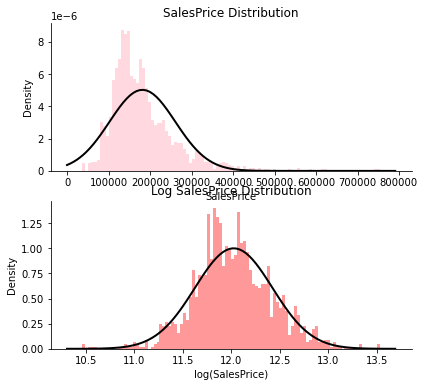

SalesPrice Skew: 1.883
SalesPrice Skew: 0.121


In [12]:
SalesPrice_fig = plt.figure(constrained_layout=True,figsize=(10,6))
SalesPrice_grid = gridspec.GridSpec(ncols=3,nrows=2,figure=SalesPrice_fig)


fig1 = SalesPrice_fig.add_subplot(SalesPrice_grid[0,:2])
fig1.set_title("SalesPrice Distribution")
mu, std = norm.fit(train_data["SalePrice"])
train_data["SalePrice"].hist(bins=100,color="pink",density=True,alpha=0.6)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel("SalesPrice")
plt.ylabel("Density")
plt.grid(False)
sns.despine()

fig2 = SalesPrice_fig.add_subplot(SalesPrice_grid[1, :2])
fig2.set_title("Log SalesPrice Distribution")
mu, std = norm.fit(np.log(train_data["SalePrice"]))
(np.log(train_data["SalePrice"])).hist(bins=100,color="red",density=True,alpha=0.4)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel("log(SalesPrice)")
plt.ylabel("Density")
plt.grid(False)
sns.despine()


plt.show()
print(f"SalesPrice Skew: {round(train_data['SalePrice'].skew(),3)}")
print(f"SalesPrice Skew: {round(np.log(train_data['SalePrice']).skew(),3)}")

/Users/kathleenlara/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/kathleenlara/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/kathleenlara/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  fig.canvas.print_figure(bytes_io, **kw)


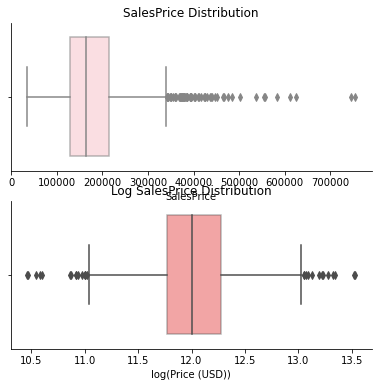

In [13]:
SalesPrice_fig = plt.figure(constrained_layout=True,figsize=(10,6))
SalesPrice_grid = gridspec.GridSpec(ncols=3,nrows=2,figure=SalesPrice_fig)


fig1 = SalesPrice_fig.add_subplot(SalesPrice_grid[0, :2])
fig1.set_title("SalesPrice Distribution")
sns.boxplot(train_data.SalePrice, orient="h", ax=fig1, color="pink", boxprops=dict(alpha=.6))
plt.xlabel("SalesPrice")
plt.grid(False)
sns.despine()


fig2 = SalesPrice_fig.add_subplot(SalesPrice_grid[1, :2])
fig2.set_title("Log SalesPrice Distribution")
sns.boxplot(np.log(train_data.SalePrice), orient="h", ax=fig2, color="red", boxprops=dict(alpha=.4))
plt.xlabel("log(Price (USD))")
plt.grid(False)
sns.despine()


plt.show()

# Observing Numeric Independent Variables

/Users/kathleenlara/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  fig.canvas.print_figure(bytes_io, **kw)


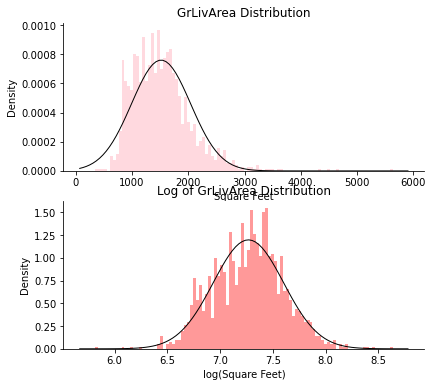

In [14]:
#GrLivArea

GrLivArea_fig = plt.figure(constrained_layout=True,figsize=(10,6))
GrLivArea_grid = gridspec.GridSpec(ncols=3,nrows=2,figure=GrLivArea_fig)


fig1 = GrLivArea_fig.add_subplot(GrLivArea_grid[0,:2])
fig1.set_title("GrLivArea Distribution")
mu, std = norm.fit(train_data["GrLivArea"])
train_data["GrLivArea"].hist(bins=100,color="pink",density=True,alpha=0.6)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=1)
plt.xlabel("Square Feet")
plt.ylabel("Density")
plt.grid(False)
sns.despine()


fig2 = GrLivArea_fig.add_subplot(GrLivArea_grid[1, :2])
fig2.set_title("Log of GrLivArea Distribution")
mu, std = norm.fit(np.log(train_data["GrLivArea"]))
(np.log(train_data["GrLivArea"])).hist(bins=100,color="red",density=True,alpha=0.4)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=1)
plt.xlabel("log(Square Feet)")
plt.ylabel("Density")
plt.grid(False)
sns.despine()


plt.show()

/Users/kathleenlara/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/kathleenlara/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/kathleenlara/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  fig.canvas.print_figure(bytes_io, **kw)


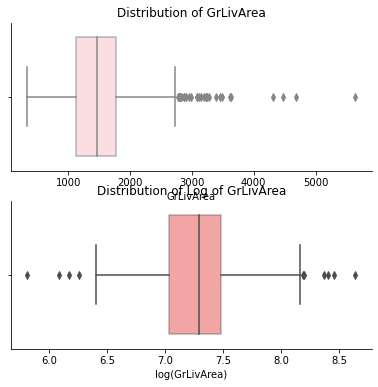

In [15]:
GrLivArea_fig = plt.figure(constrained_layout=True,figsize=(10,6))
GrLivArea_grid = gridspec.GridSpec(ncols=3,nrows=2,figure=GrLivArea_fig)


fig1 = GrLivArea_fig.add_subplot(GrLivArea_grid[0, :2])
fig1.set_title("Distribution of GrLivArea")
sns.boxplot(train_data.GrLivArea, orient="h", ax=fig1, color="pink", boxprops=dict(alpha=.6))
plt.xlabel("GrLivArea")
plt.grid(False)
sns.despine()


fig2 = GrLivArea_fig.add_subplot(GrLivArea_grid[1, :2])
fig2.set_title("Distribution of Log of GrLivArea")
sns.boxplot(np.log(train_data.GrLivArea), orient="h", ax=fig2, color="red", boxprops=dict(alpha=.4))
plt.xlabel("log(GrLivArea)")
plt.grid(False)
sns.despine()


plt.show()

/Users/kathleenlara/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  fig.canvas.print_figure(bytes_io, **kw)


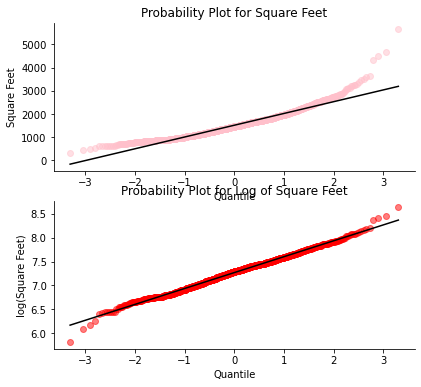

In [16]:
GrLivArea_fig = plt.figure(constrained_layout=True,figsize=(10,6))
GrLivArea_grid = gridspec.GridSpec(ncols=3,nrows=2,figure=GrLivArea_fig)


fig1 = GrLivArea_fig.add_subplot(GrLivArea_grid[0, :2])
stats.probplot(train_data["GrLivArea"], plot = fig1)

plt.title("Probability Plot for Square Feet")
plt.xlabel("Quantile")
plt.ylabel("Square Feet")

fig1.get_lines()[0].set_markeredgecolor('pink')
fig1.get_lines()[0].set_markerfacecolor('pink')
fig1.get_lines()[0].set_alpha(0.5)
fig1.get_lines()[1].set_color('black')

plt.grid(False)
sns.despine()


fig2 = GrLivArea_fig.add_subplot(GrLivArea_grid[1, :2])
stats.probplot(np.log(train_data.GrLivArea), plot = fig2)

plt.title("Probability Plot for Log of Square Feet")
plt.xlabel("Quantile")
plt.ylabel("log(Square Feet)")

fig2.get_lines()[0].set_markeredgecolor('red')
fig2.get_lines()[0].set_markerfacecolor('red')
fig2.get_lines()[0].set_alpha(0.5)
fig2.get_lines()[1].set_color('black')

plt.grid(False)
sns.despine()


plt.show()

/Users/kathleenlara/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  fig.canvas.print_figure(bytes_io, **kw)


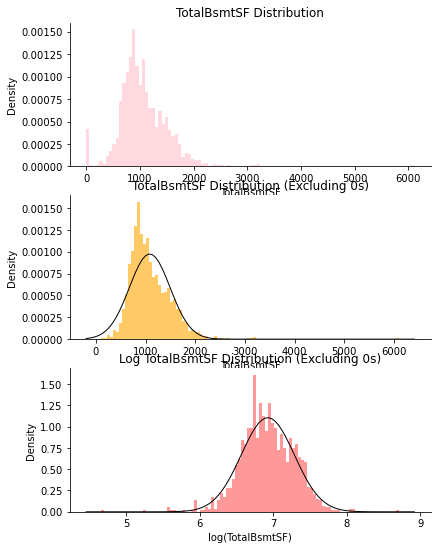

In [17]:
#TotalBsmtSF : Total Basement Square Feet

basement_training = train_data[train_data["TotalBsmtSF"]>0]

# Establish figure and grid to create two charts in the same image
TotalBsmtSF_fig = plt.figure(constrained_layout=True,figsize=(10,9))
TotalBsmtSF_grid = gridspec.GridSpec(ncols=3,nrows=3,figure=TotalBsmtSF_fig)

# Create histogram for basement square feet data
fig1 = TotalBsmtSF_fig.add_subplot(TotalBsmtSF_grid[0,:2])
fig1.set_title("TotalBsmtSF Distribution")
train_data["TotalBsmtSF"].hist(bins=100,color="pink",density=True,alpha=0.6)
plt.xlabel("TotalBsmtSF")
plt.ylabel("Density")
plt.grid(False)
sns.despine()

# Create histogram for basement square feet data (exclusing 0 values)
fig2 = TotalBsmtSF_fig.add_subplot(TotalBsmtSF_grid[1, :2])
fig2.set_title("TotalBsmtSF Distribution (Excluding 0s)")
mu, std = norm.fit(basement_training["TotalBsmtSF"])
basement_training["TotalBsmtSF"].hist(bins=100,color="orange",density=True,alpha=0.6)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=1)

plt.xlabel("TotalBsmtSF")
plt.ylabel("Density")
plt.grid(False)
sns.despine()

# Create histogram for log of basement square feet data
fig3 = TotalBsmtSF_fig.add_subplot(TotalBsmtSF_grid[2, :2])
fig3.set_title("Log TotalBsmtSF Distribution (Excluding 0s)")
mu, std = norm.fit(np.log(basement_training["TotalBsmtSF"]))
(np.log(basement_training["TotalBsmtSF"])).hist(bins=100,color="red",density=True,alpha=0.4)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=1)

plt.xlabel("log(TotalBsmtSF)")
plt.ylabel("Density")
plt.grid(False)
sns.despine()

# Display the charts
plt.show()

/Users/kathleenlara/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  fig.canvas.print_figure(bytes_io, **kw)


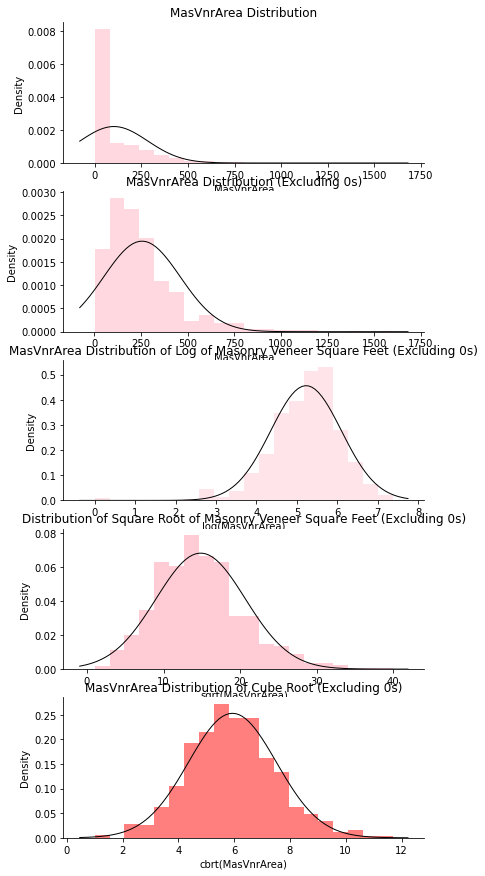

In [18]:
masonry_training = train_data[train_data["MasVnrArea"]>0]


MasVnrArea_fig = plt.figure(constrained_layout=True,figsize=(10,15))
MasVnrArea_grid = gridspec.GridSpec(ncols=3,nrows=5,figure=MasVnrArea_fig)


fig1 = MasVnrArea_fig.add_subplot(MasVnrArea_grid[0,:2])
fig1.set_title("MasVnrArea Distribution")
mu, std = norm.fit(train_data["MasVnrArea"])
train_data["MasVnrArea"].hist(bins=20,color="pink",density=True,alpha=0.6)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=1)
plt.xlabel("MasVnrArea")
plt.ylabel("Density")
plt.grid(False)
sns.despine()


fig2 = MasVnrArea_fig.add_subplot(MasVnrArea_grid[1,:2])
fig2.set_title("MasVnrArea Distribution (Excluding 0s)")
mu, std = norm.fit(masonry_training["MasVnrArea"])
masonry_training["MasVnrArea"].hist(bins=20,color="pink",density=True,alpha=0.6)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=1)
plt.xlabel("MasVnrArea")
plt.ylabel("Density")
plt.grid(False)
sns.despine()


fig3 = MasVnrArea_fig.add_subplot(MasVnrArea_grid[2, :2])
fig3.set_title("MasVnrArea Distribution of Log of Masonry Veneer Square Feet (Excluding 0s)")
mu, std = norm.fit(np.log(masonry_training["MasVnrArea"]))
(np.log(masonry_training["MasVnrArea"])).hist(bins=20,color="pink",density=True,alpha=0.4)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=1)
plt.xlabel("log(MasVnrArea)")
plt.ylabel("Density")
plt.grid(False)
sns.despine()


fig4 = MasVnrArea_fig.add_subplot(MasVnrArea_grid[3, :2])
fig4.set_title("Distribution of Square Root of Masonry Veneer Square Feet (Excluding 0s)")
mu, std = norm.fit(np.sqrt(masonry_training["MasVnrArea"]))
(np.sqrt(masonry_training["MasVnrArea"])).hist(bins=20,color="pink",density=True,alpha=0.8)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=1)
plt.xlabel("sqrt(MasVnrArea)")
plt.ylabel("Density")
plt.grid(False)
sns.despine()


fig5 = MasVnrArea_fig.add_subplot(MasVnrArea_grid[4, :2])
fig5.set_title("MasVnrArea Distribution of Cube Root (Excluding 0s)")
mu, std = norm.fit(np.cbrt(masonry_training["MasVnrArea"]))
(np.cbrt(masonry_training["MasVnrArea"])).hist(bins=20,color="red",density=True,alpha=0.5)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=1)
plt.xlabel("cbrt(MasVnrArea)")
plt.ylabel("Density")
plt.grid(False)
sns.despine()


plt.show()

# Observing Categorial Independent Variables: Ordinal & Nominal

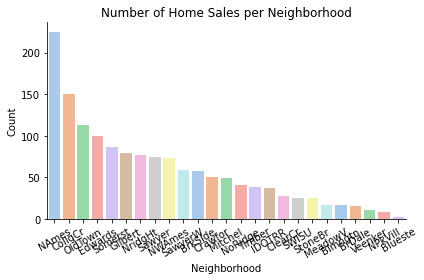

In [19]:
neighborhood_countplot=sns.countplot(x="Neighborhood",data=train_data, palette="pastel", order = train_data["Neighborhood"].value_counts().index)
neighborhood_countplot.set_xticklabels(neighborhood_countplot.get_xticklabels(),rotation=30)

# Chart labels and formatting
plt.xlabel("Neighborhood")
plt.ylabel("Count")
plt.title("Number of Home Sales per Neighborhood")
plt.grid(False)
sns.despine()
plt.tight_layout()

# Show chart and save
plt.show()

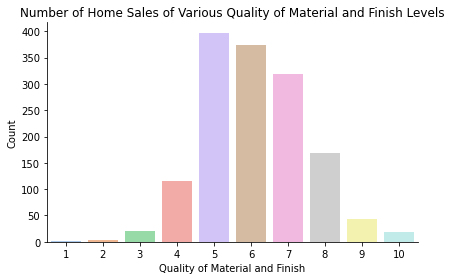

In [20]:
neighborhood_countplot=sns.countplot(x="OverallQual",data=train_data, palette="pastel")


plt.xlabel("Quality of Material and Finish")
plt.ylabel("Count")
plt.title("Number of Home Sales of Various Quality of Material and Finish Levels")
plt.grid(False)
sns.despine()
plt.tight_layout()

plt.show()